# S03_T01_Visualització_exploratòria

### Ex1:Resumeix gràficament el data set DelayedFlights.csv
### Crea almenys una visualització per:
+ Una variable categòrica (UniqueCarrier)
+ Una variable numèrica (ArrDelay)
+ Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
+ Dues variables numèriques (ArrDelay i DepDelay)
+ Tres variables (ArrDelay, DepDelay i UniqueCarrier)
+ Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [27]:
# importem totes les llibreries necessàries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
#carreguem dataset DelayedFlights.csv i ens quedem amb les columnes que necessitem per la tasca
#per poder treballar millor, i no enlentir el notebook
data_frame = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
#Filtrem i guardem només les columnes que ens interessen
#[Month,DayOfMonth,DayOfWeek,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled, Diverted]
visual_delayFlights = data_frame.iloc[:, [2,3,4,9,10,14,15,16,17,18,19,22,24]]


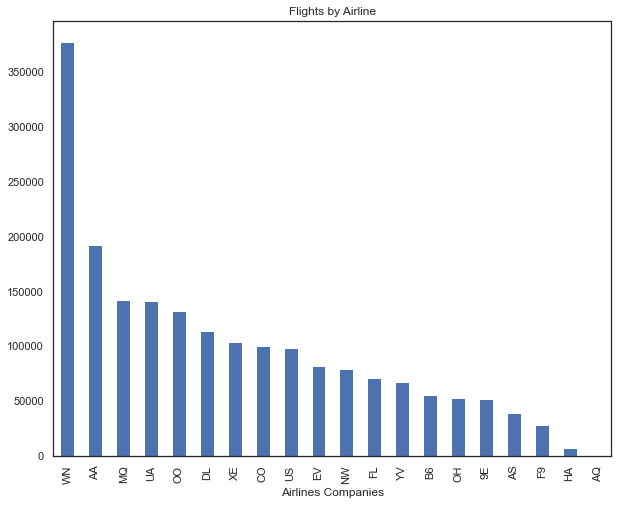

In [29]:
#Visualització per una variable categorica (UniqueCarrier)
#Consulting the recommended types of graph related to the type and quantity of variable (https://www.data-to-viz.com)
#A barplot shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.
#Create a barplot for Unique Carrier (categorical variable)

plt.figure(figsize=(10,8))

airline = visual_delayFlights.groupby("UniqueCarrier")

airline.size().sort_values(ascending=False).plot.bar()

plt.xlabel("Airlines Companies")
plt.title("Flights by Airline")

#save the graphic
plt.savefig("Airlines_plot_bar.png")

plt.show()


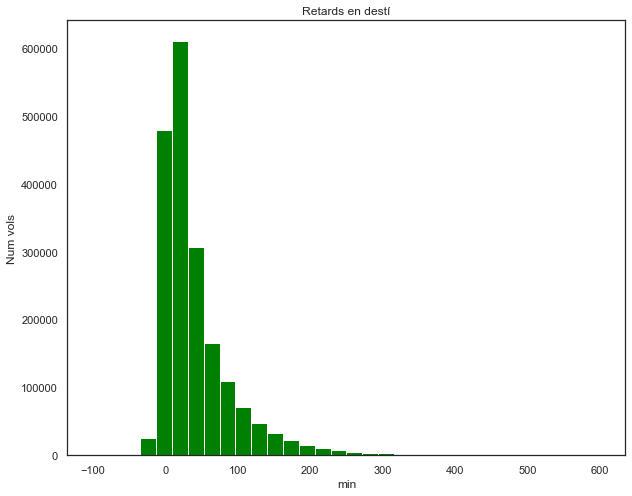

In [30]:
#Visualització per una variable numèrica (ArrDelay)
#Histogram to show the frequency of ArrDelays
#An histogram is a graph showing frequency distributions

arr_delay = visual_delayFlights.ArrDelay

plt.figure(figsize =(10, 8))
plt.hist(arr_delay, bins=32, range=(-100, 600),color="green")
plt.xlabel("min")
plt.ylabel("Num vols")
plt.title("Retards en destí")

plt.savefig("ArrDelay_histogram.png")
plt.show()


In [31]:
pd.options.display.max_rows=None
arr_delay = visual_delayFlights.ArrDelay
arr_delay.describe()

count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

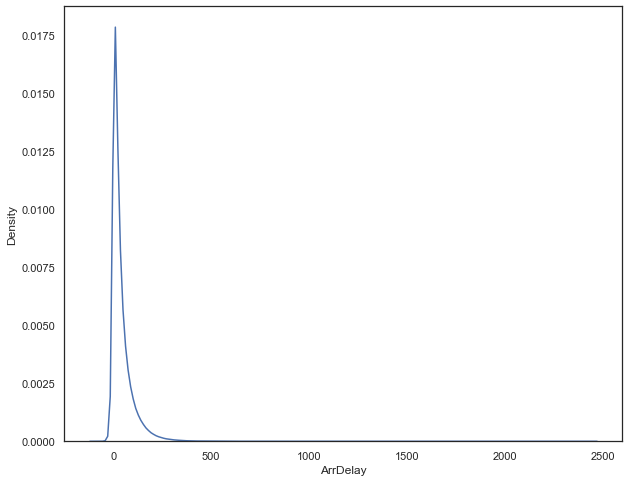

In [32]:
#Density chart

#arrDelay = visual_delayFlights.groupby("ArrDelay")
plt.figure(figsize =(10, 8))
sns.kdeplot(visual_delayFlights["ArrDelay"])
plt.savefig("delay_density.png")
plt.show()

Veiem que els dos gràfics ens mostren el mateix comportament, la gran majoria de vols tenen un retard de menys de 1 hora; observem que tenim retards negatius que hauriem d'estudiar les dades per saber més.

<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay (min)'>

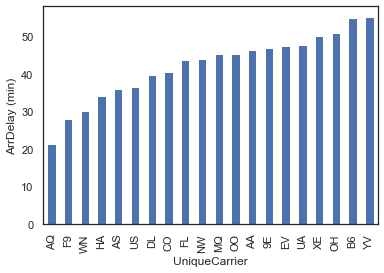

In [33]:
#Visualització d'una variable numèrica i una catgegòrica (ArrDelay i UniqueCarrier)
#Barplot
 
airline_delay = visual_delayFlights.groupby("UniqueCarrier")["ArrDelay"].mean()
airline_delay = airline_delay.sort_values()
plt.ylabel("ArrDelay (min)")
airline_delay.plot.bar()

La aerolinea amb menys retardament és AQ (Aloha Airlines), i les que pateixen mes retardament són B6 (JetBlue Airways) i YV (Mesa Airlines). El mateix resultat el podem veure en el següent gràfic Boxplot

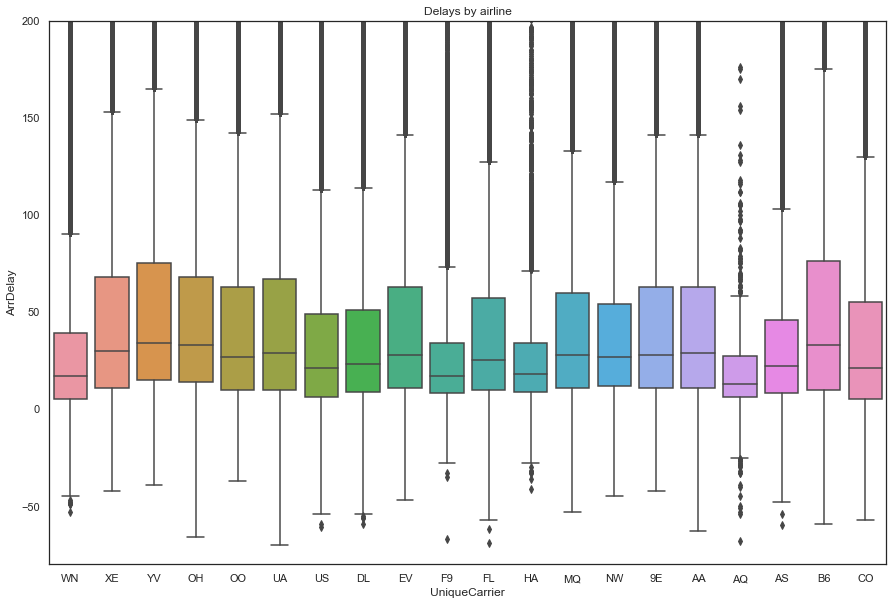

In [34]:
#Com a gràfic recomanat farem un BoxPlot
#
plt.figure(figsize =(15, 10))
plt.title("Delays by airline")
plt.ylabel("ArrDelay (min)")
plt.ylim(-80, 200)
sns.boxplot(x=visual_delayFlights["UniqueCarrier"],y=visual_delayFlights["ArrDelay"])

plt.savefig("delaybyaeroline.png")


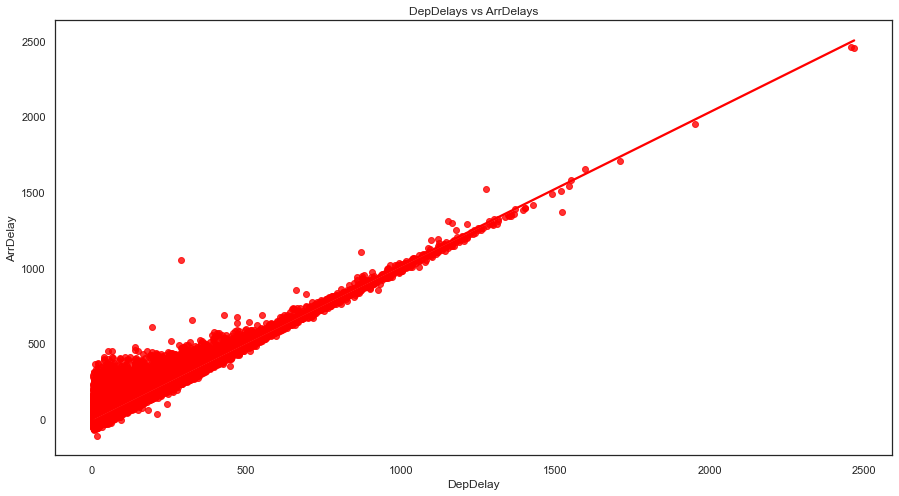

In [35]:
#Visualització dues variables numèriques (ArrDelay i DepDelay)
#ScatterPlot: The regplot() function on Seaborn
#Use the function regplot() to make the scatterplot

plt.figure(figsize=(15,8))
sns.regplot(x=visual_delayFlights["DepDelay"], y=visual_delayFlights["ArrDelay"], color="red")
plt.title("DepDelays vs ArrDelays")
plt.savefig("scatter_delays.png")


Podem veure que hi ha una correlacio bastant lineal entre els dos paràmetres de Delays

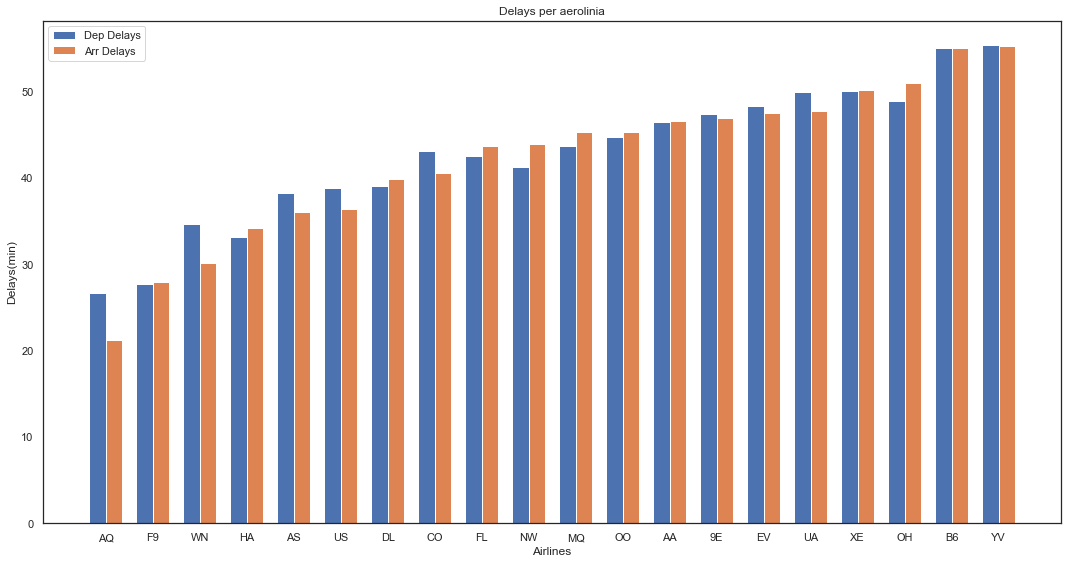

In [36]:
#Visualització tres variables (ArrDelay, DepDelay i UniqueCarrier)
#Grouped Barplot(Delay(min)) per cada aerolinia)

delays_airline = visual_delayFlights[["ArrDelay", "DepDelay"]].groupby(visual_delayFlights.UniqueCarrier).mean()
delays_airline = delays_airline.sort_values("ArrDelay")
xlabels= delays_airline.index
delays_arr= delays_airline.ArrDelay
delays_dep = delays_airline.DepDelay

x = np.arange(len(xlabels))  # the label locations
width = 0.35  # the width of the bars

#dos subplots, un per a cada delay
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, delays_dep, width, label="Dep Delays")
rects2 = ax.bar(x + width/2, delays_arr, width, label="Arr Delays")

# Afegim text de labels, titol...
ax.set_ylabel("Delays(min)")
ax.set_xlabel("Airlines")
ax.set_title("Delays per aerolinia")
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.legend()

#https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.tight_layout
fig.tight_layout()

plt.savefig("3var_groupedbarplot.png")

plt.show()


Pel gràfic podem observar que en la majoria de vols i companyies el retard de sortida i el de arribadasón similars, però n'hi ha uns quants en el que s'ha pogut reduïr el temps d'arribada, guanyant temps de vol(com és el cas de les aerolinees AQ,WN,AS,US,CO,SE,EV,UA,YV). 

delays = [delays_arr, delays_dep]
arr_dep_dely =pd.concat(delays, axis=1, keys=["ArrDelay", "DepDelay"])

sns.set(style="white")
sns.barplot(x=x, y=arr_dep_dely)

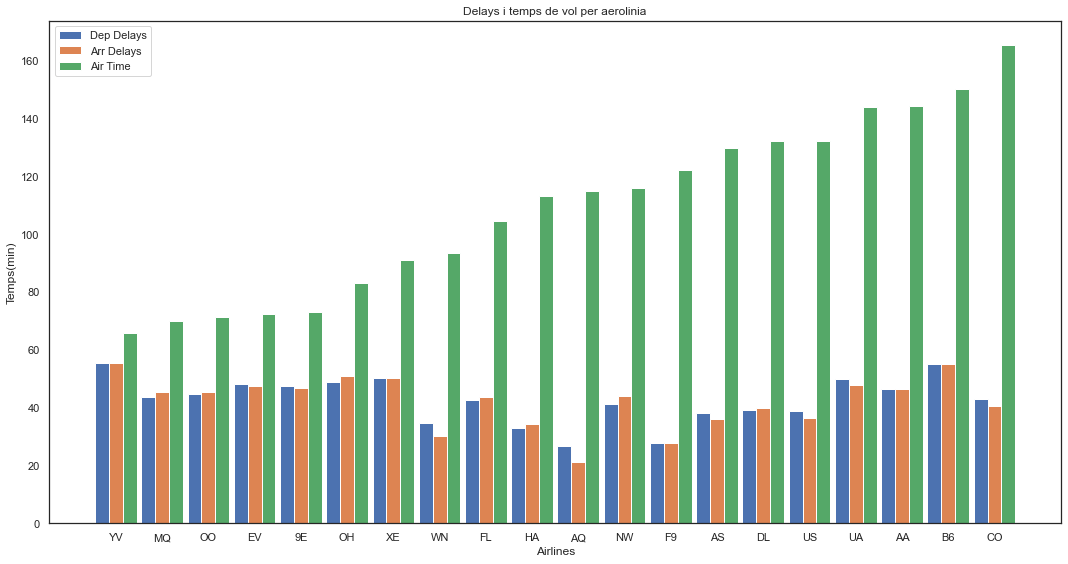

In [37]:
#Visualització de més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)
#Grouped Barplot (Delays i temps de vol per aerolinia)
airline_time_delays= visual_delayFlights[["ArrDelay", "DepDelay", "AirTime"]].groupby(visual_delayFlights.UniqueCarrier).mean()
airline_time_delays= airline_time_delays.sort_values("AirTime")
airline_time_delays

xlabels= airline_time_delays.index
delays_arr= airline_time_delays.ArrDelay
delays_dep = airline_time_delays.DepDelay
air_time = airline_time_delays.AirTime

x = np.arange(len(xlabels))  # the label locations
width = 0.9 # the width of the bars

#tres subplots, un per a cada delay i un altre pel temps de vol
fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/3, delays_dep, width/3, label="Dep Delays")
rects2 = ax.bar(x, delays_arr, width/3, label="Arr Delays")
rects3 = ax.bar(x + width/3, air_time, width/3, label="Air Time")

# Afegim text de labels, titol...
ax.set_ylabel("Temps(min)")
ax.set_xlabel("Airlines")
ax.set_title("Delays i temps de vol per aerolinia")
ax.set_xticks(x)
ax.set_xticklabels(xlabels)
ax.legend()

#https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.tight_layout
fig.tight_layout()

plt.savefig("4var_groupedbarplot.png")

plt.show()


Podem concloure que els primers vols del gràfic que són els de durada més curta, tenen uns delays molt grans,és a dir, l'usuari està molt temps d'espera a l'aeroport, per un temps de vol curt! En canvi, els últims vols del gràfic que són els més llargs de durada, experiment proporcionalment uns delays més curts d'espera.Les millors aerolinies són AQ i F9, ja que són les que tenen un delay més curt de durada, respecte el vol.

### Ex2: Exporta els gràfics com imatges o com html

Els gràfics estan exportats com a imatges(.png), afegides al final del codi dels diferents gràfics

+ plt.savefig("Airlines_plot_bar.png")
+ plt.savefig("ArrDelay_histogram.png")
+ plt.savefig("delay_density.png")
+ plt.savefig("delaybyaeroline.png")
+ plt.savefig("scatter_delays.png")
+ plt.savefig("3var_groupedbarplot.png")
+ plt.savefig("4var_groupedbarplot.png")

### Ex3: Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2

En el github, amb un nou commit, s'actualitza la Task5 del Sprint2 incloent-hi els gràfics!